In [1]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def show(images) :
    if type(images) is np.ndarray:
        images = [images]
    l = len(images)
    fig = plt.figure()
    fig.set_size_inches(20,20)
    for i,image in enumerate(images):
        fig.add_subplot(1, l, i+1)
        if len(image.shape) == 3:
            b,g,r = cv2.split(image)
            plt.imshow(cv2.merge((r,g,b)))
        else:
            plt.imshow(image, cmap='Greys')
          
    plt.show()


In [3]:
im = cv2.imread('input/red_barrels.png')


In [4]:
def split_up(min,max,ticks):
    return [int(min + (max-min) * i / float(ticks)) for i in range(ticks+1)]

In [5]:
vanishing_point_xy = (718,270)

In [6]:
def draw_vanishing_lines(im):
    im_h, im_w, _ = im.shape
    radius = 10
    thickness = 3

    color = (255,50,50,100)

    im = cv2.circle(im,vanishing_point_xy,radius,color)

    for x in split_up(0-5000,im_w+5000,ticks=30):
      cv2.line(im, (x,im_h), vanishing_point_xy, color)


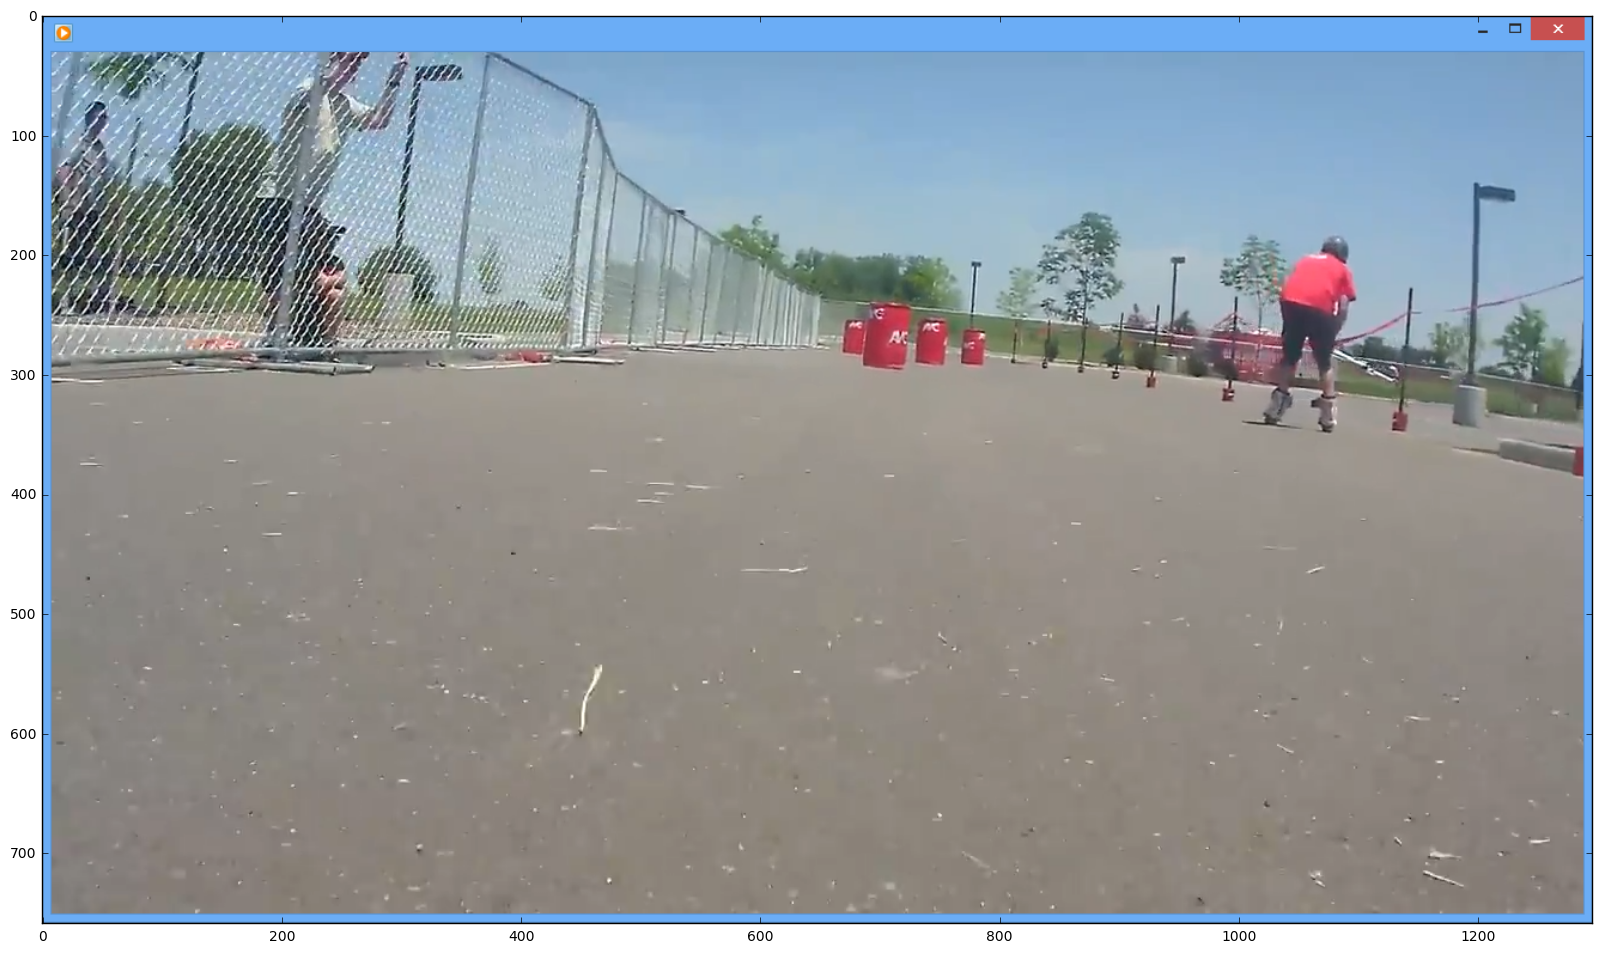

In [7]:
show(im)

In [8]:
# based on https://stackoverflow.com/a/30333177/383967
def get_red_mask(img):
    img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # lower mask (0-10)
    lower_red = np.array([0,50,50])
    upper_red = np.array([10,255,255])
    mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

    # upper mask (170-180)
    lower_red = np.array([170,50,50])
    upper_red = np.array([180,255,255])
    mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

    # join masks
    mask = np.invert(mask0+mask1)
    
    return mask



In [9]:
def mask_image(img, mask):
    output_img = img.copy()
    output_img[np.where(mask==0)] = 0
    return output_img


In [10]:
def find_red(img):
    return mask_image(img, get_red_mask(img))


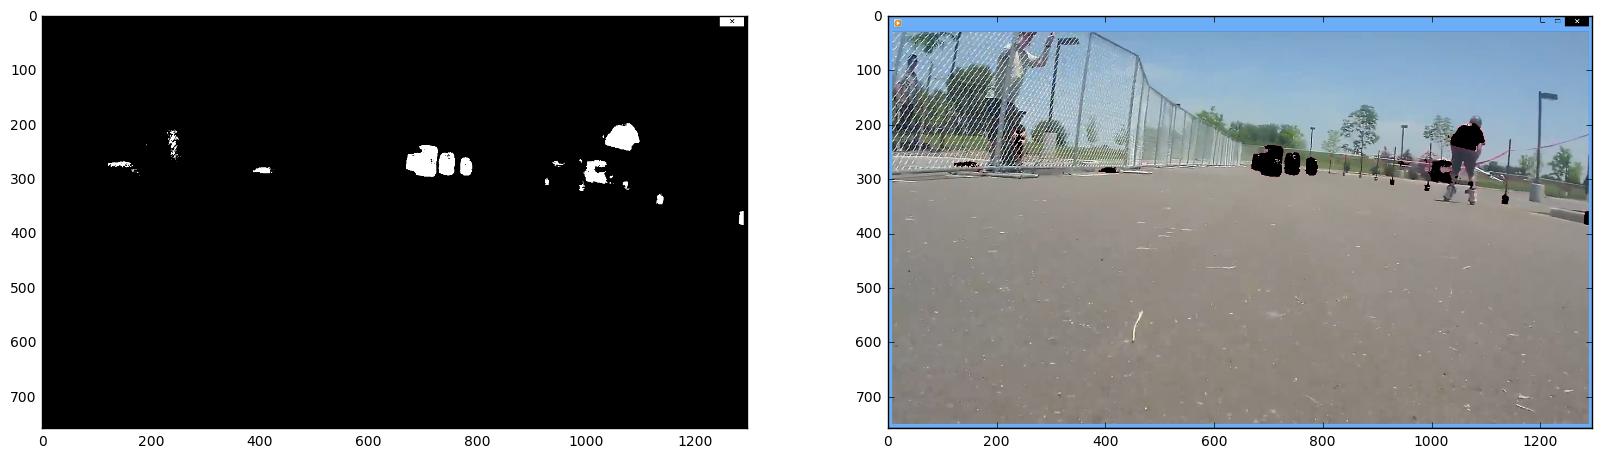

In [11]:
im_mask = get_red_mask(im)
im_red = find_red(im)
show([im_mask, im_red])


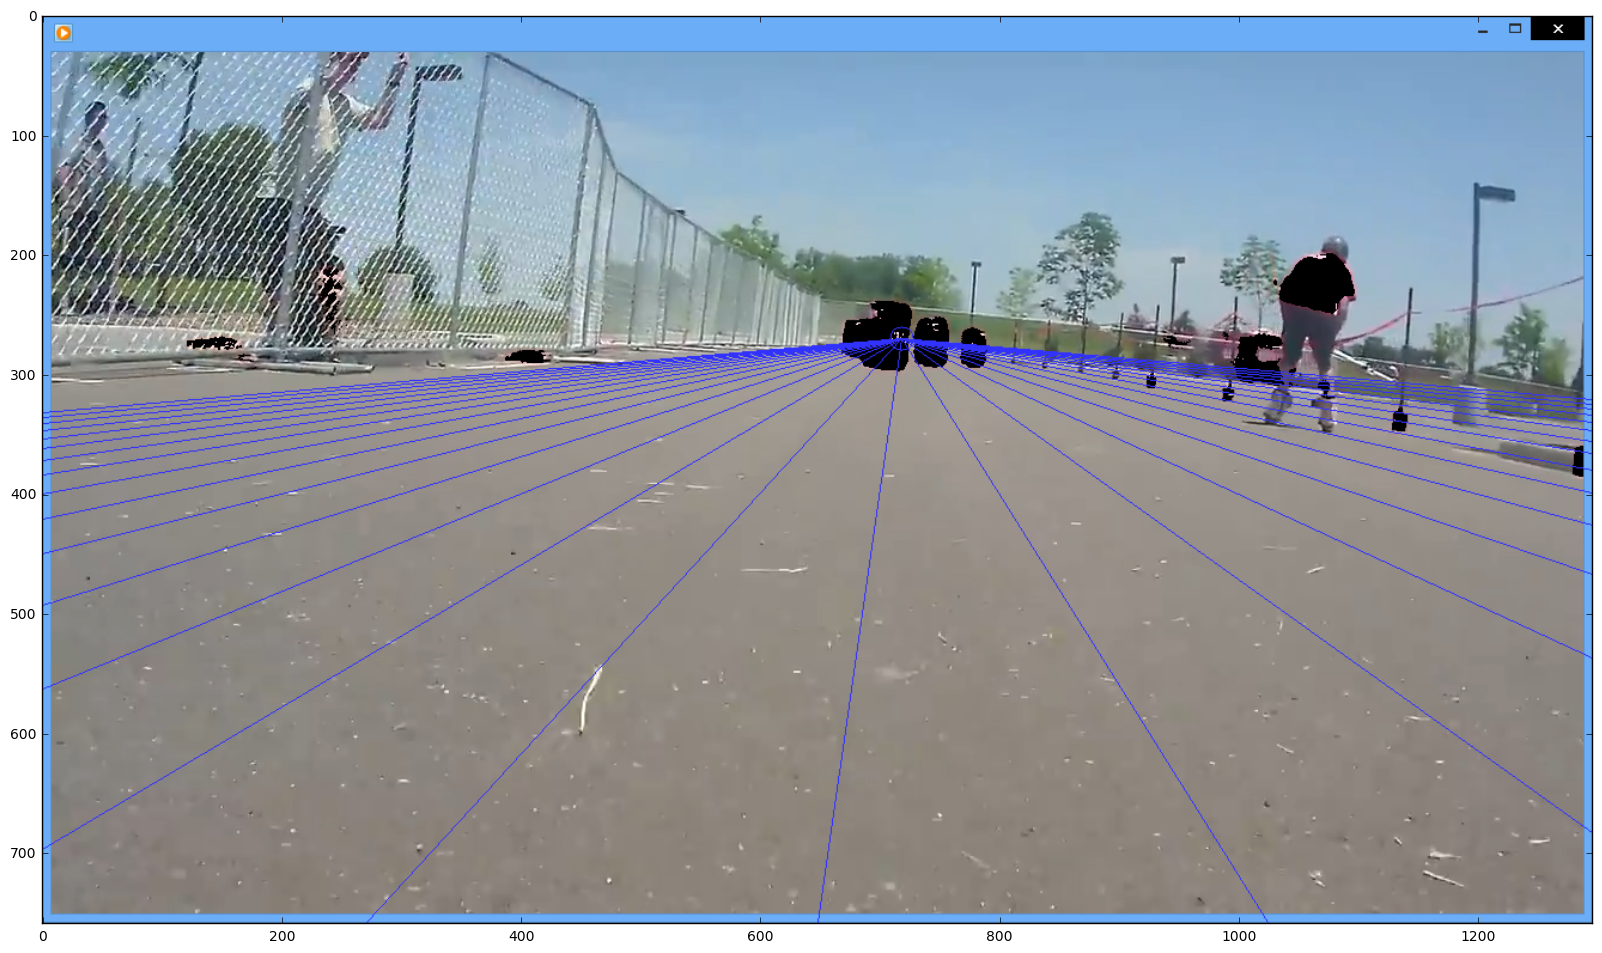

In [12]:
draw_vanishing_lines(im_red)
show([im_red])

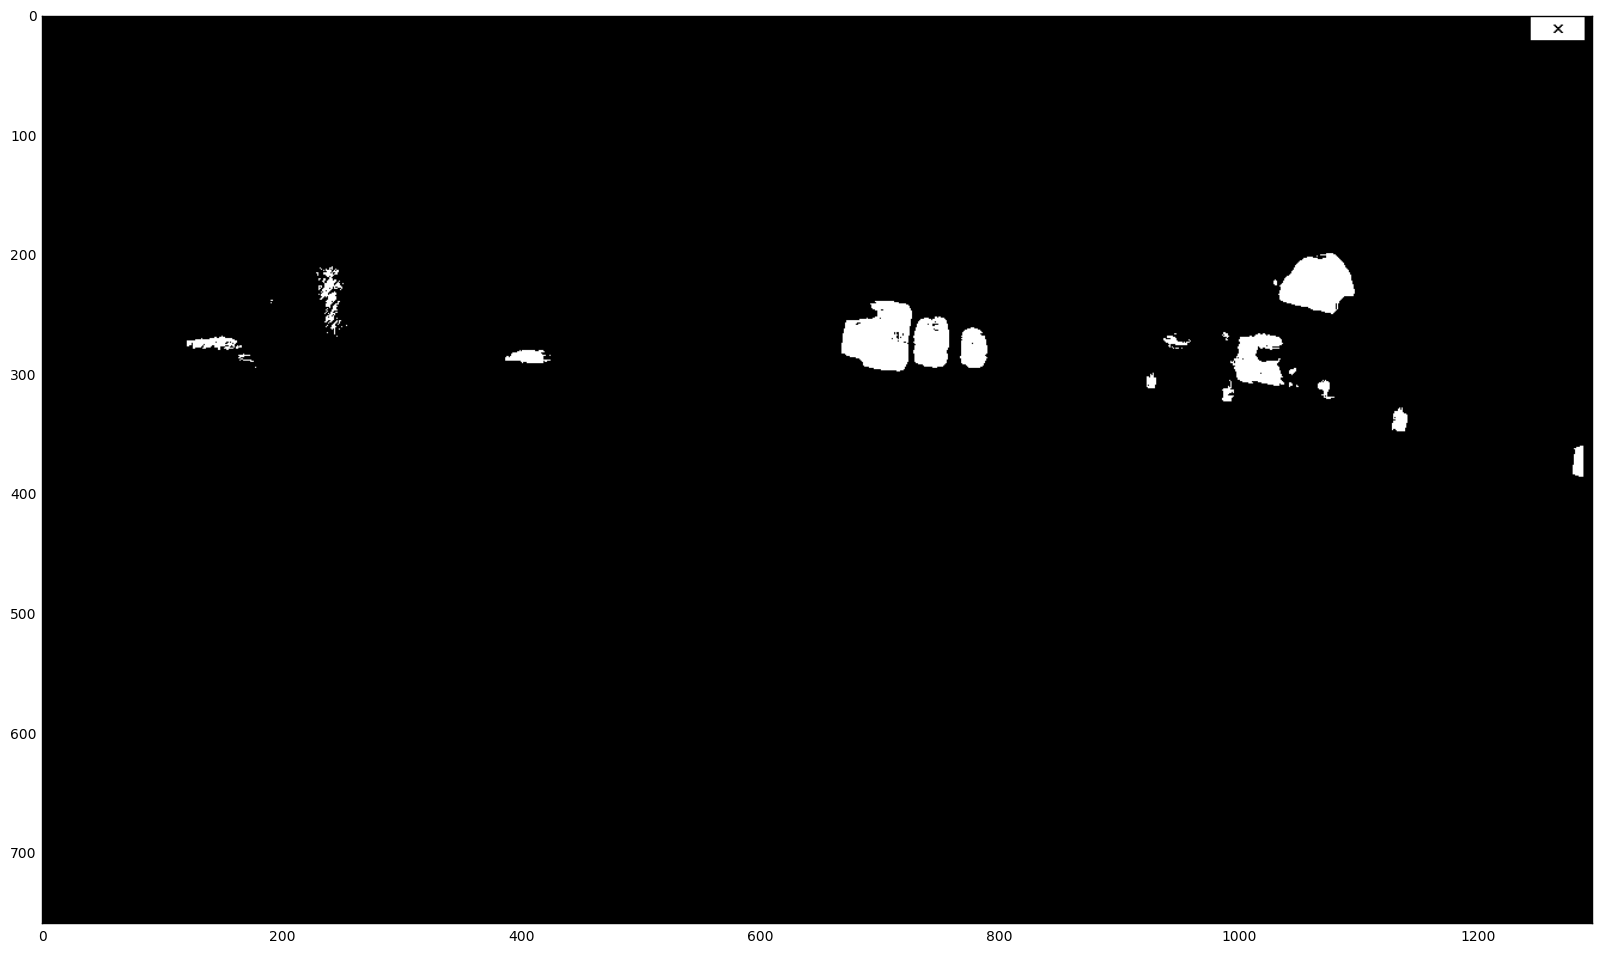

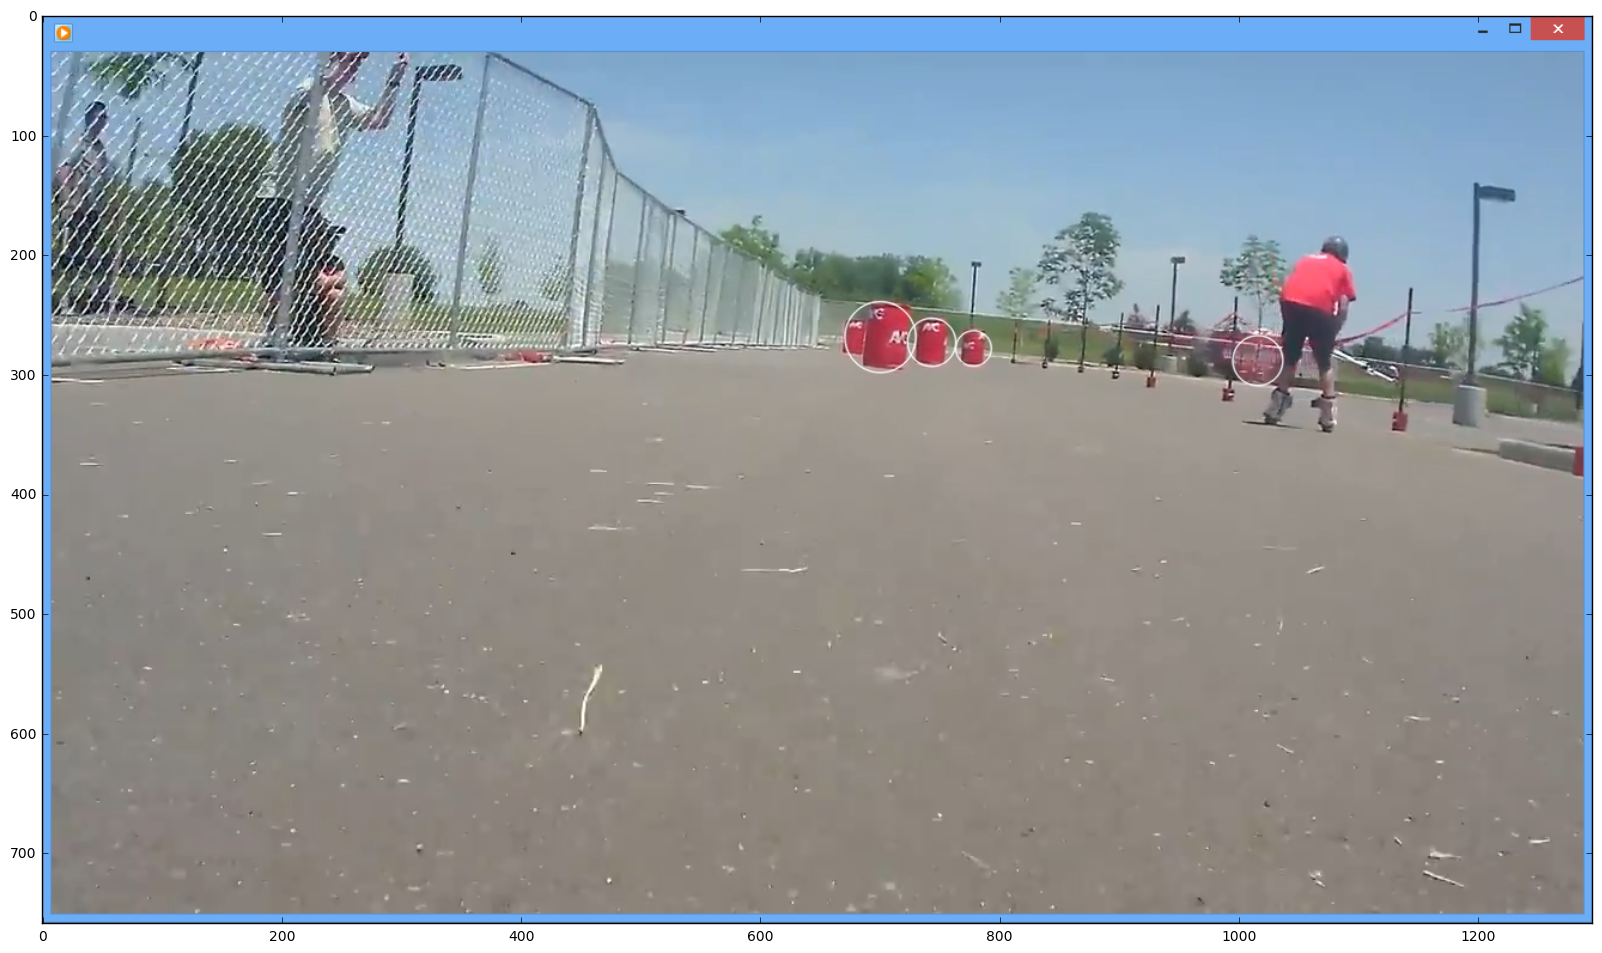

In [18]:
#cv2.SimpleBlobDetector_create
# Set up the detector with default parameters.
params = cv2.SimpleBlobDetector_Params()
params.minArea = 20*20
params.filterByArea = True
params.filterByCircularity = False
params.filterByColor = False
params.filterByConvexity = False
params.filterByInertia = False
params.maxArea = 300*3000
detector = cv2.SimpleBlobDetector_create(params)
 
# Detect blobs.
keypoints = detector.detect(im_mask)
im_blank = np.zeros_like(im)
 
horizon = vanishing_point_xy[1]
keypoints = [k for k in keypoints if k.pt[1] < vanishing_point_xy[1]+30]
keypoints = [k for k in keypoints if k.pt[1]+k.size/2. > vanishing_point_xy[1]]

# Draw detected blobs as circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (255,255,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


show(im_mask)
show(im_with_keypoints)

In [14]:
horizon


270

In [15]:
# top of barrel should be above horizon, bottom of barrel should be below horizon
# middle of barrel should be above horizon

In [16]:
len(keypoints)

4

In [17]:
for k in keypoints:
    print('angle', k.angle)
    print('class_id',k.class_id)
    print('octave', k.octave)
    print('pt',k.pt)
    print('response',k.response)
    print('size',k.size)
    print()

angle -1.0
class_id -1
octave 0
pt (1015.419921875, 288.3818054199219)
response 0.0
size 41.72144317626953

angle -1.0
class_id -1
octave 0
pt (777.9080810546875, 278.2149658203125)
response 0.0
size 29.582252502441406

angle -1.0
class_id -1
octave 0
pt (742.9247436523438, 273.1470642089844)
response 0.0
size 40.241310119628906

angle -1.0
class_id -1
octave 0
pt (700.06005859375, 268.7454528808594)
response 0.0
size 59.199520111083984

